# <p style="text-align: center;"> Complex Networks Analysis  </p>

## <p style="text-align: center;"> Nima Rafizadeh, Amirhossein Hajigholam Saryazdi </p>
## <p style="text-align: center;"> Winter 2022 </p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# !pip install visibility_graph 
# !pip install node2vec

# from visibility_graph import visibility_graph
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from tqdm import tqdm
from node2vec import Node2Vec


from: can't read /var/mail/node2vec


In [ ]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NYISO.xlsx')
sample = df.head(48)
#sample = df
series = sample['RealTimePrice']

201

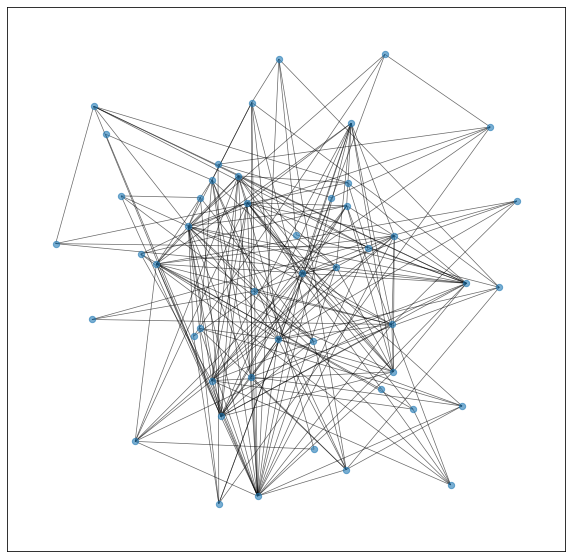

In [ ]:
#https://github.com/rgarcia-herrera/visibility_graph
g1 = nx.Graph()
tseries = []
n = 0
for i in series:
    tseries.append((n, i))
    n += 1
for a, b in combinations(tseries, 2):
    (ta, ya) = a
    (tb, yb) = b
    connect = True   
    for tc, yc in tseries[ta:tb]:           
            if tc != ta and tc != tb:
                if (yc > yb + (ya - yb) * ((tb - tc) / (tb - ta))):
                     connect = False                  
    if connect:     
       g1.add_edge(ya, yb) 
plt.figure(figsize=(10,10))
pos = nx.random_layout(g1, seed=123)
nx.draw_networkx(g1, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)
len(g1.edges)

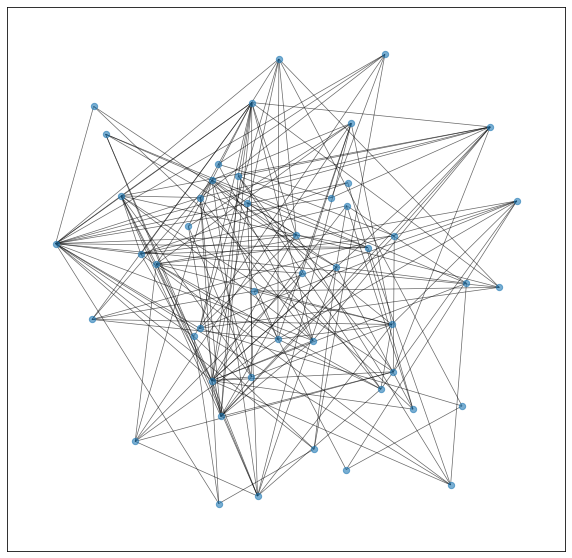

In [ ]:
# visibility of graph and, the same hour 
g2 = nx.Graph()
tseries = []
n = 0
for i in series:
    tseries.append((n, i))
    n += 1
for a, b in combinations(tseries, 2):
    (ta, ya) = a
    (tb, yb) = b
    connect = True   
    for tc, yc in tseries[ta:tb]:           
            if tc != ta and tc != tb:
                if (yc > yb + (ya - yb) * ((tb - tc) / (tb - ta))) \
                    and sample.loc[sample.N == ta, 'Hour'].values[0] != sample.loc[sample.N == tb, 'Hour'].values[0]:
                     connect = False                  
    if connect:     
       g2.add_edge(ya, yb)
plt.figure(figsize=(10,10))
pos = nx.random_layout(g2, seed=123)
nx.draw_networkx(g2, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

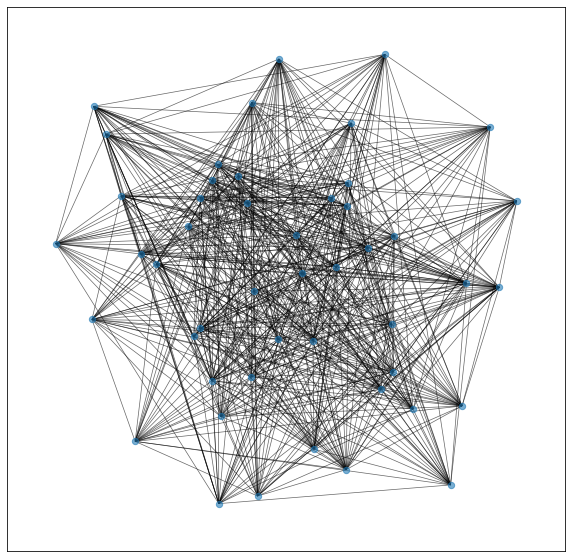

In [ ]:
# visibility of graph and, the same hour, dayofweek
g3 = nx.Graph()
tseries = []
n = 0
for i in series:
    tseries.append((n, i))
    n += 1
for a, b in combinations(tseries, 2):
    (ta, ya) = a
    (tb, yb) = b
    connect = True        
    connect = True   
    for tc, yc in tseries[ta:tb]:           
            if tc != ta and tc != tb:
                if (yc > yb + (ya - yb) * ((tb - tc) / (tb - ta))) \
                    and sample.loc[sample.N == ta, 'Hour'].values[0] != sample.loc[sample.N == tb, 'Hour'].values[0] \
                    and sample.loc[sample.N == ta, 'DW'].values[0]!=sample.loc[sample.N == tb, 'DW'].values[0]:
                     connect = False                  
    if connect:    
       g3.add_edge(ya, yb)
plt.figure(figsize=(10,10))
pos = nx.random_layout(g3, seed=123)
nx.draw_networkx(g3, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

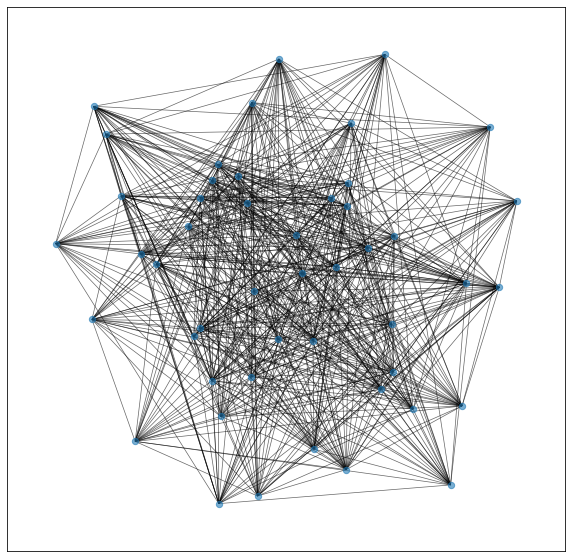

In [ ]:
# visibility of graph and, the same hour, dayofweek, day
g4 = nx.Graph()
tseries = []
n = 0
for i in series:
    tseries.append((n, i))
    n += 1
for a, b in combinations(tseries, 2):
    (ta, ya) = a
    (tb, yb) = b
    connect = True   
    for tc, yc in tseries[ta:tb]:           
            if tc != ta and tc != tb:
                if (yc > yb + (ya - yb) * ((tb - tc) / (tb - ta))) \
                    and sample.loc[sample.N == ta, 'Hour'].values[0] != sample.loc[sample.N == tb, 'Hour'].values[0] \
                    and sample.loc[sample.N == ta, 'DW'].values[0]!=sample.loc[sample.N == tb, 'DW'].values[0] \
                    and sample.loc[sample.N == ta, 'Day'].values[0]!=sample.loc[sample.N == tb, 'Day'].values[0]:
                     connect = False                  
    if connect:     
       g4.add_edge(ya, yb)
plt.figure(figsize=(10,10))
pos = nx.random_layout(g4, seed=123)
nx.draw_networkx(g4, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

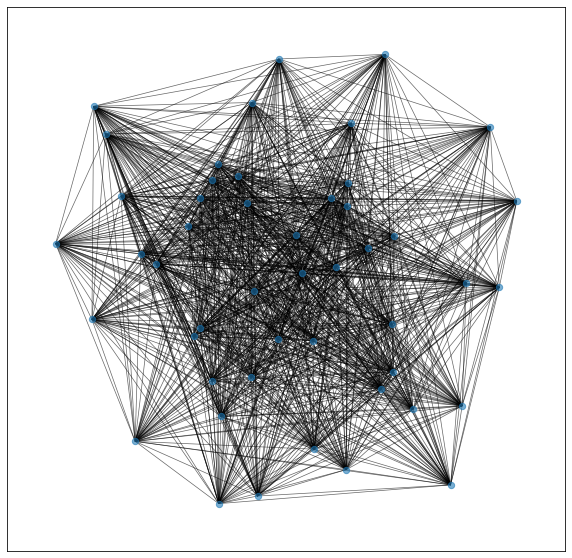

In [ ]:
# visibility of graph and, the same hour, dayofweek, day, and month
g5 = nx.Graph()  
tseries = []
n = 0
for i in series:
    tseries.append((n, i))
    n += 1 
for a, b in combinations(tseries, 2):   
    (ta, ya) = a
    (tb, yb) = b
    connect = True   
    for tc, yc in tseries[ta:tb]:           
            if tc != ta and tc != tb:
                if (yc > yb + (ya - yb) * ((tb - tc) / (tb - ta))) \
                    and sample.loc[sample.N == ta, 'Hour'].values[0] != sample.loc[sample.N == tb, 'Hour'].values[0] \
                    and sample.loc[sample.N == ta, 'DW'].values[0]!=sample.loc[sample.N == tb, 'DW'].values[0] \
                    and sample.loc[sample.N == ta, 'Day'].values[0]!=sample.loc[sample.N == tb, 'Day'].values[0] \
                    and sample.loc[sample.N == ta, 'Month'].values[0]!=sample.loc[sample.N == tb, 'Month'].values[0]:
                     connect = False                  
    if connect:          
       g5.add_edge(ya, yb) 
plt.figure(figsize=(10,10))
pos = nx.random_layout(g5, seed=123)
nx.draw_networkx(g5, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

**Link Predcition**


In [ ]:
# get a list of nodes in our graph
l = list(g1.nodes())
 
# create adjacency matrix
adj_g1 = nx.to_numpy_matrix(g1, nodelist = l)
 
print(str(adj_g1.shape)+'\n')
adj_g1

(48, 48)



matrix([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
# Get a list of existing

# get all node pairs which don't have an edge
existing_edges = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_g1.shape[0])):
   for j in range(offset,adj_g1.shape[1]):
       if i != j:
           if adj_g1[i,j] == 1: 
                   existing_edges.extend([(l[i],l[j])])



 
   offset = offset + 1

100%|██████████| 48/48 [00:00<00:00, 14500.62it/s]


In [ ]:
existing_edges = existing_edges
print(existing_edges[:2])
print(len(existing_edges))

[(26.500667572021484, 32.9188346862793), (32.9188346862793, 29.593000411987305)]
201


In [ ]:
# Get a list of non-existing edges

# get all node pairs which don't have an edge
non_existing_edges = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_g1.shape[0])):
   for j in range(offset,adj_g1.shape[1]):
       if i != j:
           if adj_g1[i,j] == 0: 
                   non_existing_edges.extend([(l[i],l[j])])



 
   offset = offset + 1

100%|██████████| 48/48 [00:00<00:00, 8864.72it/s]


In [ ]:
non_existing_edges = non_existing_edges
print(non_existing_edges[:2])
print(len(non_existing_edges))

[(26.500667572021484, 29.593000411987305), (26.500667572021484, 25.994556427001953)]
927


In [ ]:
# DataFrame of non existing edges

df1 = pd.DataFrame(data = non_existing_edges, columns =['Node 1', 'Node 2'])
 
# create a column 'Connection' with default 0 (no-connection)
df1['Connection'] = 0
 
df1.head()

,Node 1,Node 2,Connection
0,26.500668,29.593000,0
1,26.500668,25.994556,0
2,26.500668,27.138111,0
3,26.500668,18.947666,0
4,26.500668,25.502445,0


In [ ]:
# DataFrame of existing edges

df2 = pd.DataFrame(data = existing_edges, columns =['Node 1', 'Node 2'])
 
# create a column 'Connection' with default 0 (no-connection)
df2['Connection'] = 1
 
df2.head()

,Node 1,Node 2,Connection
0,26.500668,32.918835,1
1,32.918835,29.593000,1
2,32.918835,25.994556,1
3,32.918835,27.138111,1
4,32.918835,18.947666,1


In [ ]:
# concatenating two above data frames

frames = [df1,df2]
df_concat = pd.concat(frames)
#df_concat = df_concat.sort_values(by=['Node 1'])

df_concat.reset_index()
df_concat

,Node 1,Node 2,Connection
0,26.500668,29.593000,0
1,26.500668,25.994556,0
2,26.500668,27.138111,0
3,26.500668,18.947666,0
4,26.500668,25.502445,0
...,...,...,...
196,27.560612,27.374277,1
197,27.560612,27.420166,1
198,27.560612,24.364445,1
199,25.714277,27.374277,1


### Link prediction using Node2Vec for g1
http://education.abcom.com/link-prediction-using-node2vec/

In [ ]:
# Frature extraction with node embedding (node2vec)

# Generating walks
node2vec = Node2Vec(g1, dimensions=100, walk_length=16, num_walks=50)
 
# training the node2vec model
n2v_model = node2vec.fit(window=7, min_count=1)

Computing transition probabilities:   0%|          | 0/48 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:02<00:00, 18.11it/s]


In [ ]:
edge_features = [(n2v_model[str(i)]+n2v_model[str(j)])
for i,j in zip(df_concat['Node 1'], df_concat['Node 2'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
# Building the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, auc, roc_curve, roc_auc_score,confusion_matrix



In [ ]:
X = np.array(edge_features)  
y = df_concat['Connection']



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


In [ ]:
# random forest
#classifier
clf1 = RandomForestClassifier()
 
# parameters
param = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]}
 
# model
grid_clf_acc1 = GridSearchCV(clf1, param_grid = param)
 
# train the model
grid_clf_acc1.fit(X_train, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc1.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc1.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc1 = GridSearchCV(clf1, param_grid = param, scoring = 'roc_auc')
grid_clf_auc1.fit(X_train, y_train)
predict_proba = grid_clf_auc1.predict_proba(X_test)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc1.best_params_)
print('Grid best score (AUC): ', grid_clf_auc1.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 10, 'n_estimators': 50}
Grid best score (accuracy):  0.9031186912634878
Test set AUC:  0.9485445010260698
Grid best parameter (max. AUC):  {'max_depth': 15, 'n_estimators': 100}
Grid best score (AUC):  0.9406051077804563


In [ ]:
# gradiant boost
# classifier
clf2 = GradientBoostingClassifier()
 
# parameters
param = {'learning_rate' : [.05,.1]}
 
# model
grid_clf_acc2 = GridSearchCV(clf2, param_grid = param)
 
# train the model
grid_clf_acc2.fit(X_train, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc2.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc2.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc2 = GridSearchCV(clf2, param_grid = param, scoring = 'roc_auc')
grid_clf_auc2.fit(X_train, y_train)
predict_proba = grid_clf_auc2.predict_proba(X_test)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc2.best_params_)
print('Grid best score (AUC): ', grid_clf_auc2.best_score_)

Grid best parameter (max. accuracy):  {'learning_rate': 0.05}
Grid best score (accuracy):  0.8830003480682214
Test set AUC:  0.927719084897773
Grid best parameter (max. AUC):  {'learning_rate': 0.05}
Grid best score (AUC):  0.9309686266289348


In [ ]:
# MLP
# classifier
clf3 = MLPClassifier(max_iter=1000)
 
# scaling training and test sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
# parameters
param = {'hidden_layer_sizes' : [10,100,[10,10]], 'activation' : ['tanh','relu'], 'solver' : ['adam','lbfgs']}
 
# model
grid_clf_acc3 = GridSearchCV(clf3, param_grid = param)
 
# train the model
grid_clf_acc3.fit(X_train_scaled, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc3.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc3.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc3 = GridSearchCV(clf3, param_grid = param, scoring = 'roc_auc')
grid_clf_auc3.fit(X_train_scaled, y_train)
predict_proba = grid_clf_auc3.predict_proba(X_test_scaled)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc3.best_params_)
print('Grid best score (AUC): ', grid_clf_auc3.best_score_)

In [ ]:
# Prediction
pred = grid_clf_auc3.predict(X_test_scaled)
pred[:5]


In [ ]:
# accuracy score

accuracy_score(pred,y_test)

In [ ]:
# confusion score
confusion_matrix(pred,y_test)

### Link prediction by similiarity measures
http://education.abcom.com/link-prediction-using-similarity-measures/ 

In [ ]:
#making a copy of the original dataframe
df_2 = df_concat.copy()
 
#sorting according to the nodes
df_2.sort_values(['Node 1', 'Node 2'], inplace=True)
 
#getting the two nodes in a row in a tuple, i.e (Node 1, Node 2) and adding then to a new Edges column
edges = [(df_concat.iloc[i,0],df_concat.iloc[i,1]) for i in range(df_concat.shape[0])]
df_2['Edges'] = edges
 
#dropping the Node 1 and Node 2 columns and setting the Edges column as index
df_2.drop(columns=df_2.columns[:2], inplace=True)
df_2.set_index('Edges', inplace=True)
 
df_2.head()

In [ ]:
# Common neighbours
df_2['Common_Neigh'] = [len(list(nx.common_neighbors(g1, e[0],e[1]))) for e in df_2.index]

In [ ]:
# Jaccard Coeff

#creating a new temporary dataframe for storing the similarity measure values
df_3 = pd.DataFrame()
 
#finding jaccard coefficients
jaccard = list(nx.jaccard_coefficient(g1, list(df_2.index)))
 
#storing the values in the new dataframe and setting the index as edges
df_3['Jaccard_Coef'] = [i[2] for i in jaccard]
df_3['Edges'] = [(i[0],i[1]) for i in jaccard]
df_3.set_index('Edges', inplace=True)
 
#merging the new dataframe with our previous 'df2' dataframe
df_2 = df_2.join(df_3, how='inner')

In [ ]:
# Resource allocation index

df_3 = pd.DataFrame()
 
#finding resource allocation index
resource_alloc = list(nx.resource_allocation_index(g1, list(df_2.index)))
 
#storing the values in a new dataframe and setting the index as edges
df_3['Resource_Alloc'] = [i[2] for i in resource_alloc]
df_3['index'] = [(i[0],i[1]) for i in resource_alloc]
df_3.set_index('index', inplace=True)
 
#merging the new dataframe with our previous 'df2' dataframe
df_2 = df_2.join(df_3, how='inner')

In [ ]:
# Adamic Adar index

df_3 = pd.DataFrame()
 
#finding adamic adar index
adamic_adar = list(nx.adamic_adar_index(g1, list(df_2.index)))
 
#storing the values in a new dataframe and setting the index as edges
df_3['Adamic_Adar'] = [i[2] for i in adamic_adar]
df_3['index'] = [(i[0],i[1]) for i in adamic_adar]
df_3.set_index('index', inplace=True)
 
#merging the new dataframe with our previous 'df2' dataframe
df_2 = df_2.join(df_3, how='inner')

In [ ]:
# Preferential Attachment

df_3 = pd.DataFrame()

#finding preferential attachment
preferential_attach = list(nx.preferential_attachment(g1, list(df_2.index)))
 
#storing the values in a new dataframe and setting the index as edges
df_3['Preferential_Attach'] = [i[2] for i in preferential_attach]
df_3['index'] = [(i[0],i[1]) for i in preferential_attach]
df_3.set_index('index', inplace=True)
 
#merging the new dataframe with our previous 'df2' dataframe
df_2 = df_2.join(df_3, how='inner')

In [ ]:
# Similarity measures value

df_2.head()

In [ ]:
# Correlation between measures
import seaborn as sns


_ , ax = plt.subplots(figsize =(14, 12))
 
#setting the colormap
colormap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap = True)
 
#creating the heatmap
_ = sns.heatmap(df_2.corr(), cmap = colormap, square=True, cbar_kws={'shrink':.9 }, ax=ax, annot=True,
                                                    linewidths=0.1,vmax=1.0, linecolor='black', annot_kws={'fontsize':12 })
  
#adding title
plt.title('Pearson Correlation of Features', y=1.05, size=15)


In [ ]:
# Model building

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, roc_auc_score,confusion_matrix

In [ ]:
#features    
X = df_2.iloc[:,1:] 

#target
y = df_2['Connection']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
 
#this will be used only for MLP Classifier
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Random Forest
#classifier
clf1 = RandomForestClassifier()
 
#parameters
param = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]}
 
#model
grid_clf_acc1 = GridSearchCV(clf1, param_grid = param)
 
#training the model
grid_clf_acc1.fit(X_train, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc1.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc1.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc1 = GridSearchCV(clf1, param_grid = param, scoring = 'roc_auc')
grid_clf_auc1.fit(X_train, y_train)
predict_proba = grid_clf_auc1.predict_proba(X_test)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc1.best_params_)
print('Grid best score (AUC): ', grid_clf_auc1.best_score_)

In [ ]:
# GBoost

#classifier
clf2 = GradientBoostingClassifier()
 
#parameters
param = {'learning_rate' : [.05,.1]}
 
#model
grid_clf_acc2 = GridSearchCV(clf2, param_grid = param)
 
#training the model
grid_clf_acc2.fit(X_train, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc2.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc2.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc2 = GridSearchCV(clf2, param_grid = param, scoring = 'roc_auc')
grid_clf_auc2.fit(X_train, y_train)
predict_proba = grid_clf_auc2.predict_proba(X_test)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc2.best_params_)
print('Grid best score (AUC): ', grid_clf_auc2.best_score_)

In [ ]:
# MLP
#classifier
clf3 = MLPClassifier(max_iter=1000)
 
#scaling training and test sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
#parameters
param = {'hidden_layer_sizes' : [10,100,[10,10]], 'activation' : ['tanh','relu'], 'solver' : ['adam','lbfgs']}
 
#model
grid_clf_acc3 = GridSearchCV(clf3, param_grid = param)
 
#training the model
grid_clf_acc3.fit(X_train_scaled, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc3.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc3.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc3 = GridSearchCV(clf3, param_grid = param, scoring = 'roc_auc')
grid_clf_auc3.fit(X_train_scaled, y_train)
predict_proba = grid_clf_auc3.predict_proba(X_test_scaled)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc3.best_params_)
print('Grid best score (AUC): ', grid_clf_auc3.best_score_)

In [ ]:
#getting predictions of out test data
pred = grid_clf_acc3.predict(X_test_scaled)

In [ ]:
# accuracy test
accuracy_score(pred,y_test)


In [ ]:
# confusion matrix
confusion_matrix(pred,y_test)


### Link Prediction for g2

In [ ]:
# get a list of nodes in our graph
l = list(g2.nodes())
 
# create adjacency matrix
adj_g2 = nx.to_numpy_matrix(g2, nodelist = l)
 
print(str(adj_g2.shape)+'\n')
adj_g2
# Get a list of existing and non-existing edges

from tqdm import tqdm

# get all node pairs which don't have an edge
non_existing_edges = []
existing_edges = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_g2.shape[0])):
   for j in range(offset,adj_g2.shape[1]):
       if i != j:
           if adj_g2[i,j] == 1: # ==1
                   #non_existing_edges.extend([(l[i],l[j])])
                   existing_edges.extend([(l[i],l[j])])


 
   offset = offset + 1
#non_existing_edges = non_existing_edges
print(non_existing_edges[:2])
print(len(non_existing_edges))
#existing_edges = existing_edges
print(existing_edges[:2])
print(len(existing_edges))
# DataFrame of non existing edges

df1 = pd.DataFrame(data = non_existing_edges, columns =['Node 1', 'Node 2'])
 
# create a column 'Connection' with default 0 (no-connection)
df1['Connection'] = 0
 
df1.head()
# DataFrame of existing edges

df2 = pd.DataFrame(data = existing_edges, columns =['Node 1', 'Node 2'])
 
# create a column 'Connection' with default 0 (no-connection)
df2['Connection'] = 1
 
df2.head()
# merging two above data frames

frames = [df1,df2]
df_concat = pd.concat(frames)
#df_concat = df_concat.sort_values(by=['Node 1'])

df_concat.reset_index()
df_concat
# Frature extraction with node embedding (node2vec)

# Generating walks
node2vec = Node2Vec(g2, dimensions=100, walk_length=16, num_walks=50)
 
# training the node2vec model
n2v_model = node2vec.fit(window=7, min_count=1)
edge_features = [(n2v_model[str(i)]+n2v_model[str(j)])
for i,j in zip(df_concat['Node 1'], df_concat['Node 2'])]
X = np.array(edge_features)  
y = df_concat['Connection']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# random forest
#classifier
clf1 = RandomForestClassifier()
 
# parameters
param = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]}
 
# model
grid_clf_acc1 = GridSearchCV(clf1, param_grid = param)
 
# train the model
grid_clf_acc1.fit(X_train, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc1.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc1.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc1 = GridSearchCV(clf1, param_grid = param, scoring = 'roc_auc')
grid_clf_auc1.fit(X_train, y_train)
predict_proba = grid_clf_auc1.predict_proba(X_test)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc1.best_params_)
print('Grid best score (AUC): ', grid_clf_auc1.best_score_)
# GBoost

#classifier
clf2 = GradientBoostingClassifier()
 
#parameters
param = {'learning_rate' : [.05,.1]}
 
#model
grid_clf_acc2 = GridSearchCV(clf2, param_grid = param)
 
#training the model
grid_clf_acc2.fit(X_train, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc2.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc2.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc2 = GridSearchCV(clf2, param_grid = param, scoring = 'roc_auc')
grid_clf_auc2.fit(X_train, y_train)
predict_proba = grid_clf_auc2.predict_proba(X_test)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc2.best_params_)
print('Grid best score (AUC): ', grid_clf_auc2.best_score_)
# MLP
#classifier
clf3 = MLPClassifier(max_iter=1000)
 
#scaling training and test sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
#parameters
param = {'hidden_layer_sizes' : [10,100,[10,10]], 'activation' : ['tanh','relu'], 'solver' : ['adam','lbfgs']}
 
#model
grid_clf_acc3 = GridSearchCV(clf3, param_grid = param)
 
#training the model
grid_clf_acc3.fit(X_train_scaled, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc3.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc3.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc3 = GridSearchCV(clf3, param_grid = param, scoring = 'roc_auc')
grid_clf_auc3.fit(X_train_scaled, y_train)
predict_proba = grid_clf_auc3.predict_proba(X_test_scaled)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc3.best_params_)
print('Grid best score (AUC): ', grid_clf_auc3.best_score_)



### Link Prediction for g3

In [ ]:
# get a list of nodes in our graph
l = list(g3.nodes())
 
# create adjacency matrix
adj_g3 = nx.to_numpy_matrix(g3, nodelist = l)
 
print(str(adj_g3.shape)+'\n')
adj_g3
# Get a list of existing and non-existing edges

from tqdm import tqdm

# get all node pairs which don't have an edge
non_existing_edges = []
existing_edges = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_g3.shape[0])):
   for j in range(offset,adj_g3.shape[1]):
       if i != j:
           if adj_g3[i,j] == 1: # ==1
                   #non_existing_edges.extend([(l[i],l[j])])
                   existing_edges.extend([(l[i],l[j])])


 
   offset = offset + 1
#non_existing_edges = non_existing_edges
print(non_existing_edges[:2])
print(len(non_existing_edges))
#existing_edges = existing_edges
print(existing_edges[:2])
print(len(existing_edges))
# DataFrame of non existing edges

df1 = pd.DataFrame(data = non_existing_edges, columns =['Node 1', 'Node 2'])
 
# create a column 'Connection' with default 0 (no-connection)
df1['Connection'] = 0
 
df1.head()
# DataFrame of existing edges

df2 = pd.DataFrame(data = existing_edges, columns =['Node 1', 'Node 2'])
 
# create a column 'Connection' with default 0 (no-connection)
df2['Connection'] = 1
 
df2.head()
# merging two above data frames

frames = [df1,df2]
df_concat = pd.concat(frames)
#df_concat = df_concat.sort_values(by=['Node 1'])

df_concat.reset_index()
df_concat
# Frature extraction with node embedding (node2vec)

# Generating walks
node2vec = Node2Vec(g3, dimensions=100, walk_length=16, num_walks=50)
 
# training the node2vec model
n2v_model = node2vec.fit(window=7, min_count=1)
edge_features = [(n2v_model[str(i)]+n2v_model[str(j)])
for i,j in zip(df_concat['Node 1'], df_concat['Node 2'])]
X = np.array(edge_features)  
y = df_concat['Connection']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# random forest
#classifier
clf1 = RandomForestClassifier()
 
# parameters
param = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]}
 
# model
grid_clf_acc1 = GridSearchCV(clf1, param_grid = param)
 
# train the model
grid_clf_acc1.fit(X_train, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc1.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc1.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc1 = GridSearchCV(clf1, param_grid = param, scoring = 'roc_auc')
grid_clf_auc1.fit(X_train, y_train)
predict_proba = grid_clf_auc1.predict_proba(X_test)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc1.best_params_)
print('Grid best score (AUC): ', grid_clf_auc1.best_score_)
# GBoost

#classifier
clf2 = GradientBoostingClassifier()
 
#parameters
param = {'learning_rate' : [.05,.1]}
 
#model
grid_clf_acc2 = GridSearchCV(clf2, param_grid = param)
 
#training the model
grid_clf_acc2.fit(X_train, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc2.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc2.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc2 = GridSearchCV(clf2, param_grid = param, scoring = 'roc_auc')
grid_clf_auc2.fit(X_train, y_train)
predict_proba = grid_clf_auc2.predict_proba(X_test)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc2.best_params_)
print('Grid best score (AUC): ', grid_clf_auc2.best_score_)
# MLP
#classifier
clf3 = MLPClassifier(max_iter=1000)
 
#scaling training and test sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
#parameters
param = {'hidden_layer_sizes' : [10,100,[10,10]], 'activation' : ['tanh','relu'], 'solver' : ['adam','lbfgs']}
 
#model
grid_clf_acc3 = GridSearchCV(clf3, param_grid = param)
 
#training the model
grid_clf_acc3.fit(X_train_scaled, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc3.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc3.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc3 = GridSearchCV(clf3, param_grid = param, scoring = 'roc_auc')
grid_clf_auc3.fit(X_train_scaled, y_train)
predict_proba = grid_clf_auc3.predict_proba(X_test_scaled)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc3.best_params_)
print('Grid best score (AUC): ', grid_clf_auc3.best_score_)



### Link Prediction for g4

In [ ]:
# get a list of nodes in our graph
l = list(g4.nodes())
 
# create adjacency matrix
adj_g4 = nx.to_numpy_matrix(g4, nodelist = l)
 
print(str(adj_g4.shape)+'\n')
adj_g4
# Get a list of existing and non-existing edges

from tqdm import tqdm

# get all node pairs which don't have an edge
non_existing_edges = []
existing_edges = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_g4.shape[0])):
   for j in range(offset,adj_g4.shape[1]):
       if i != j:
           if adj_g4[i,j] == 1: # ==1
                   #non_existing_edges.extend([(l[i],l[j])])
                   existing_edges.extend([(l[i],l[j])])


 
   offset = offset + 1
#non_existing_edges = non_existing_edges
print(non_existing_edges[:2])
print(len(non_existing_edges))
#existing_edges = existing_edges
print(existing_edges[:2])
print(len(existing_edges))
# DataFrame of non existing edges

df1 = pd.DataFrame(data = non_existing_edges, columns =['Node 1', 'Node 2'])
 
# create a column 'Connection' with default 0 (no-connection)
df1['Connection'] = 0
 
df1.head()
# DataFrame of existing edges

df2 = pd.DataFrame(data = existing_edges, columns =['Node 1', 'Node 2'])
 
# create a column 'Connection' with default 0 (no-connection)
df2['Connection'] = 1
 
df2.head()
# merging two above data frames

frames = [df1,df2]
df_concat = pd.concat(frames)
#df_concat = df_concat.sort_values(by=['Node 1'])

df_concat.reset_index()
df_concat
# Frature extraction with node embedding (node2vec)

# Generating walks
node2vec = Node2Vec(g4, dimensions=100, walk_length=16, num_walks=50)
 
# training the node2vec model
n2v_model = node2vec.fit(window=7, min_count=1)
edge_features = [(n2v_model[str(i)]+n2v_model[str(j)])
for i,j in zip(df_concat['Node 1'], df_concat['Node 2'])]
X = np.array(edge_features)  
y = df_concat['Connection']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# random forest
#classifier
clf1 = RandomForestClassifier()
 
# parameters
param = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]}
 
# model
grid_clf_acc1 = GridSearchCV(clf1, param_grid = param)
 
# train the model
grid_clf_acc1.fit(X_train, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc1.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc1.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc1 = GridSearchCV(clf1, param_grid = param, scoring = 'roc_auc')
grid_clf_auc1.fit(X_train, y_train)
predict_proba = grid_clf_auc1.predict_proba(X_test)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc1.best_params_)
print('Grid best score (AUC): ', grid_clf_auc1.best_score_)
# GBoost

#classifier
clf2 = GradientBoostingClassifier()
 
#parameters
param = {'learning_rate' : [.05,.1]}
 
#model
grid_clf_acc2 = GridSearchCV(clf2, param_grid = param)
 
#training the model
grid_clf_acc2.fit(X_train, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc2.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc2.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc2 = GridSearchCV(clf2, param_grid = param, scoring = 'roc_auc')
grid_clf_auc2.fit(X_train, y_train)
predict_proba = grid_clf_auc2.predict_proba(X_test)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc2.best_params_)
print('Grid best score (AUC): ', grid_clf_auc2.best_score_)
# MLP
#classifier
clf3 = MLPClassifier(max_iter=1000)
 
#scaling training and test sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
#parameters
param = {'hidden_layer_sizes' : [10,100,[10,10]], 'activation' : ['tanh','relu'], 'solver' : ['adam','lbfgs']}
 
#model
grid_clf_acc3 = GridSearchCV(clf3, param_grid = param)
 
#training the model
grid_clf_acc3.fit(X_train_scaled, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc3.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc3.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc3 = GridSearchCV(clf3, param_grid = param, scoring = 'roc_auc')
grid_clf_auc3.fit(X_train_scaled, y_train)
predict_proba = grid_clf_auc3.predict_proba(X_test_scaled)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc3.best_params_)
print('Grid best score (AUC): ', grid_clf_auc3.best_score_)



### Link Prediction for g5

In [ ]:
# get a list of nodes in our graph
l = list(g5.nodes())
 
# create adjacency matrix
adj_g5 = nx.to_numpy_matrix(g5, nodelist = l)
 
print(str(adj_g5.shape)+'\n')
adj_g5
# Get a list of existing and non-existing edges

from tqdm import tqdm

# get all node pairs which don't have an edge
non_existing_edges = []
existing_edges = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_g5.shape[0])):
   for j in range(offset,adj_g5.shape[1]):
       if i != j:
           if adj_g5[i,j] == 1: # ==1
                   #non_existing_edges.extend([(l[i],l[j])])
                   existing_edges.extend([(l[i],l[j])])


 
   offset = offset + 1
#non_existing_edges = non_existing_edges
print(non_existing_edges[:2])
print(len(non_existing_edges))
#existing_edges = existing_edges
print(existing_edges[:2])
print(len(existing_edges))
# DataFrame of non existing edges

df1 = pd.DataFrame(data = non_existing_edges, columns =['Node 1', 'Node 2'])
 
# create a column 'Connection' with default 0 (no-connection)
df1['Connection'] = 0
 
df1.head()
# DataFrame of existing edges

df2 = pd.DataFrame(data = existing_edges, columns =['Node 1', 'Node 2'])
 
# create a column 'Connection' with default 0 (no-connection)
df2['Connection'] = 1
 
df2.head()
# merging two above data frames

frames = [df1,df2]
df_concat = pd.concat(frames)
#df_concat = df_concat.sort_values(by=['Node 1'])

df_concat.reset_index()
df_concat
# Frature extraction with node embedding (node2vec)

# Generating walks
node2vec = Node2Vec(g5, dimensions=100, walk_length=16, num_walks=50)
 
# training the node2vec model
n2v_model = node2vec.fit(window=7, min_count=1)
edge_features = [(n2v_model[str(i)]+n2v_model[str(j)])
for i,j in zip(df_concat['Node 1'], df_concat['Node 2'])]
X = np.array(edge_features)  
y = df_concat['Connection']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# random forest
#classifier
clf1 = RandomForestClassifier()
 
# parameters
param = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]}
 
# model
grid_clf_acc1 = GridSearchCV(clf1, param_grid = param)
 
# train the model
grid_clf_acc1.fit(X_train, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc1.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc1.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc1 = GridSearchCV(clf1, param_grid = param, scoring = 'roc_auc')
grid_clf_auc1.fit(X_train, y_train)
predict_proba = grid_clf_auc1.predict_proba(X_test)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc1.best_params_)
print('Grid best score (AUC): ', grid_clf_auc1.best_score_)
# GBoost

#classifier
clf2 = GradientBoostingClassifier()
 
#parameters
param = {'learning_rate' : [.05,.1]}
 
#model
grid_clf_acc2 = GridSearchCV(clf2, param_grid = param)
 
#training the model
grid_clf_acc2.fit(X_train, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc2.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc2.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc2 = GridSearchCV(clf2, param_grid = param, scoring = 'roc_auc')
grid_clf_auc2.fit(X_train, y_train)
predict_proba = grid_clf_auc2.predict_proba(X_test)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc2.best_params_)
print('Grid best score (AUC): ', grid_clf_auc2.best_score_)
# MLP
#classifier
clf3 = MLPClassifier(max_iter=1000)
 
#scaling training and test sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
#parameters
param = {'hidden_layer_sizes' : [10,100,[10,10]], 'activation' : ['tanh','relu'], 'solver' : ['adam','lbfgs']}
 
#model
grid_clf_acc3 = GridSearchCV(clf3, param_grid = param)
 
#training the model
grid_clf_acc3.fit(X_train_scaled, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc3.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc3.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc3 = GridSearchCV(clf3, param_grid = param, scoring = 'roc_auc')
grid_clf_auc3.fit(X_train_scaled, y_train)
predict_proba = grid_clf_auc3.predict_proba(X_test_scaled)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc3.best_params_)
print('Grid best score (AUC): ', grid_clf_auc3.best_score_)

